![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [34]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [7]:
# Celda 1.1
bikes.groupby('season').total.mean()
print(bikes.groupby('season').total.describe())

         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0


In [8]:
# Celda 1.2
bikes.groupby('hour').total.mean()
print(bikes.groupby('hour').total.describe())

      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   19.0   46.00  168.0
2     448.0   22.899554   26.110267   1.0    5.00   11.0   32.00  119.0
3     433.0   11.757506   12.666442   1.0    3.00    6.0   15.00   66.0
4     442.0    6.407240    4.217633   1.0    3.00    6.0    9.00   28.0
5     452.0   19.767699   12.784293   1.0    8.00   19.0   29.00   57.0
6     455.0   76.259341   54.745333   1.0   24.50   75.0  118.00  213.0
7     455.0  213.116484  159.207044   1.0   63.00  208.0  334.00  596.0
8     455.0  362.769231  231.723065   8.0  133.50  392.0  563.50  839.0
9     455.0  221.780220   92.099209  14.0  161.00  217.0  294.50  414.0
10    455.0  175.092308  101.807629  17.0  106.00  149.0  218.50  539.0
11    455.0  210.674725  127.444294  10.0  123.00  183.0  265.50

#### Conclusiones
---
Se observa que, dentro de la variable `'season'`, la temporada de **verano** (temporada 3) registró la mayor cantidad de alquileres de bicicletas, alcanzando un máximo de 977 alquileres, con un promedio de 254 alquileres por temporada. Por otro lado, el **invierno** (temporada 1) tuvo la menor actividad, con un pico máximo de 801 alquileres y un promedio de 116 alquileres por observación.

Respecto a las `horas del día`, las 17:00 h (5:00 p.m.) se destaca como el momento con mayor demanda de alquileres, con un promedio de 468 alquileres. Por otro lado, las 4:00 h (4:00 a.m.) marcan el período de menor actividad, con un promedio de tan solo 6 alquileres. Estos datos indican la variabilidad en el uso de bicicletas según la temporada y la hora del día.

### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

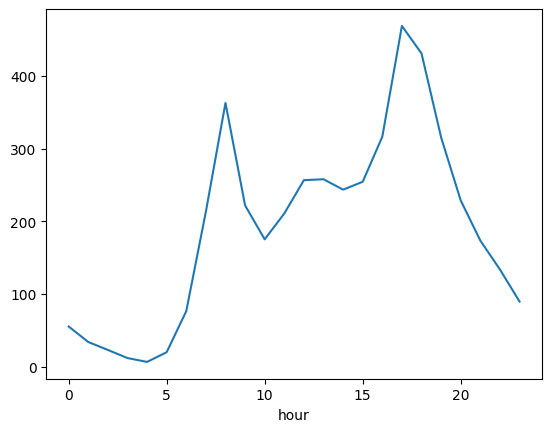

In [12]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

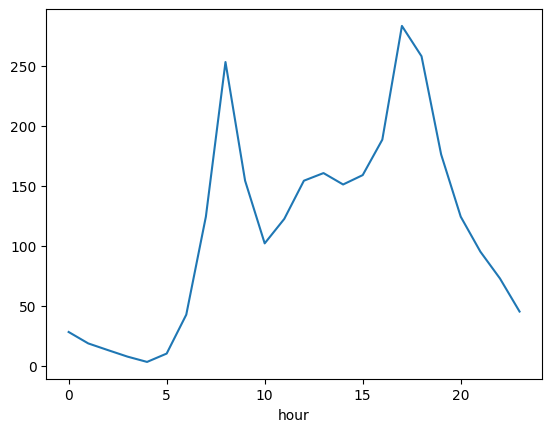

In [16]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos
bikes[bikes['season'] == 1].groupby('hour').total.mean().plot()

<Axes: xlabel='hour'>

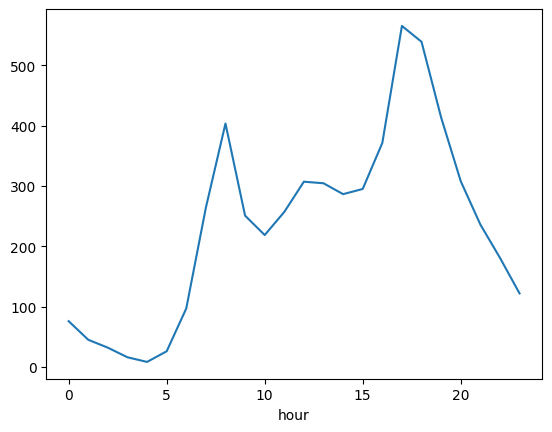

In [17]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos
bikes[bikes['season'] == 3].groupby('hour').total.mean().plot()

#### Conclusiones
---
Las gráficas muestran un patrón similar en el alquiler de bicicletas a lo largo del día, identificándose dos picos principales de actividad a las 8 a.m. y 5 p.m., así como dos periodos de menor actividad o valles a las 4 a.m. y 10 a.m. A pesar de esta similitud en los patrones temporales, la cantidad de alquileres difiere significativamente entre las estaciones: durante el verano, el número de bicicletas alquiladas es considerablemente mayor, llegando a ser aproximadamente el doble que en la temporada de invierno. Esto refleja una mayor tendencia al uso de bicicletas en los meses de verano en comparación con los meses de invierno.

### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [83]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Datos para el modelo
X = bikes[['season', 'hour']]
y = bikes['total']

# Transformar variable season en formato one - hot debido a que es de tipo categorica

# Categorias unicas en la columna 'season'
unique_seasons = bikes['season'].unique()

# Crear nuevas columnas para cada categoria en 'season' con formato one - hot
for season in unique_seasons:
  bikes[f'season_{season}'] = (bikes['season'] == season).astype(int)

# Separar la variable de respuesta y las variables predictoras
y = bikes['total']
X = bikes[[col for col in bikes.columns if 'season_' in col] + ['hour']]

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Modelo de regresion lineal
model = LinearRegression()
model.fit(X, y)

# Obtener los coeficientes e intercepto
coeficientes = model.coef_
intercepto = model.intercept_

# Imprimir los coeficientes e intercepto
print('Variables:', list(X.columns))
print('Coeficientes:', coeficientes)
print('Intecepto:', intercepto)
print()
# Hacer predicciones con el modelo
y_pred = model.predict(X_test)

# Calcular el MSE
mse = mean_squared_error(y_test, y_pred)

# Calcular el R^2
r2 = r2_score(y_test, y_pred)

# Imprimir los resultados
print(f'MSE: {mse}')
print(f'R^2: {r2}')

Variables: ['season_1', 'season_2', 'season_3', 'season_4', 'hour']
Coeficientes: [-8.30217421e+13 -8.30217421e+13 -8.30217421e+13 -8.30217421e+13
  1.05546875e+01]
Intecepto: 83021742133808.92

MSE: 25522.251344044224
R^2: 0.21567240784711417


#### Conclusiones
---
Al analizar los coeficientes del modelo de regresión lineal se puede observar que tras aplicar one-hot encoding a la variable categórica `season`, cada temporada muestra el mismo coeficiente, sugiriendo una influencia equivalente sobre la variable de respuesta. Sin embargo, esta observación parece contradecir lo observado en las gráficas y análisis previos, los cuales indican comportamientos distintos en los alquileres de bicicletas para cada estación del año. Por lo tanto, el hecho de que los coeficientes sean iguales para todas las estaciones puede señalar una limitación en la capacidad del modelo de regresión lineal para capturar la variabilidad específica sobre la variable `season` y prediciendo la variable de resultado.

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [71]:
# Celda 4

# Definición de parámetros y criterios de parada
max_depth = None
num_pct = 10
max_features = None
min_gain=0.001

# Definición de la función que calcula el gini index
def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

# Definición de la función gini_imputiry para calular la ganancia de una variable predictora j dado el punto de corte k
def gini_impurity(X_col, y, split):

    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]

    n_l = y_l.shape[0]
    n_r = y_r.shape[0]

    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)

    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)

    return gini_impurity_

# Definición de la función best_split para calcular cuál es la mejor variable y punto de cortepara hacer la bifurcación del árbol
def best_split(X, y, num_pct=10):

    features = range(X.shape[1])

    best_split = [0, 0, 0]  # j, split, gain

    # Para todas las varibles
    for j in features:

        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]

        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)

            if gain > best_split[2]:
                best_split = [j, split, gain]

    return best_split

# Crecimiento recursivo del árbol
def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):

    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], y_prob=0.5, level=level, split=-1, n_samples=1, gain=0)
        return tree

    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)

    # Guardar el árbol y estimar la predicción
    y_pred = int(y.mean() >= 0.5)
    y_prob = (y.sum() + 1.0) / (y.shape[0] + 2.0)  # Corrección Laplace

    tree = dict(y_pred=y_pred, y_prob=y_prob, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree

    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición

    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)

    return tree

# Aplicación de la función tree_grow con criterio de maxima profundidad de 3
tree = tree_grow(X, y, level=0, min_gain=0.001, max_depth=3, num_pct=10)
tree

{'y_pred': 1,
 'y_prob': 191.53903379867745,
 'level': 0,
 'split': [4, 8.0],
 'n_samples': 10886,
 'gain': 18268.811823533004,
 'sl': {'y_pred': 1,
  'y_prob': 55.40711902113459,
  'level': 1,
  'split': [4, 7.0],
  'n_samples': 3594,
  'gain': 7207.700659959655,
  'sl': {'y_pred': 1,
   'y_prob': 32.561604584527224,
   'level': 2,
   'split': [4, 6.0],
   'n_samples': 3139,
   'gain': 646.8008927589567,
   'sl': {'y_pred': 1,
    'y_prob': 25.15934475055845,
    'level': 3,
    'split': -1,
    'n_samples': 2684,
    'gain': 382.8088308604629},
   'sr': {'y_pred': 1,
    'y_prob': 75.92778993435448,
    'level': 3,
    'split': -1,
    'n_samples': 455,
    'gain': 743.095592335012}},
  'sr': {'y_pred': 1,
   'y_prob': 212.18599562363238,
   'level': 2,
   'split': [0, 1.0],
   'n_samples': 455,
   'gain': 5197.1071057533845,
   'sl': {'y_pred': 1,
    'y_prob': 241.01162790697674,
    'level': 3,
    'split': -1,
    'n_samples': 342,
    'gain': 467.29291918881063},
   'sr': {'y_pr

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [85]:
# Celda 5

# Dividir los datos en conjuntos de entrenamiento y validación
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Inicializar el modelo de árbol de decisión y calibrar parámetros
tree_params = {'max_depth': range(1, 20)}
clf = DecisionTreeRegressor()
clf.fit(X_train, y_train)

# Evaluar el desempeño del modelo
y_pred = clf.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir métricas de desempeño y los mejores parámetros encontrados
mse, r2

(13776.897591163506, 0.5766203862914421)

#### Conclusiones
---
El desempeño de ambos modelos, el de regresión lineal y el árbol de decisión, se evaluaron mediante las métricas MSE (Error Cuadrático Medio) y $R^2$ (coeficiente de determinación). El modelo de árbol de decisión demostró un mejor desempeño, evidenciado por un MSE más bajo y un $R^2$ más alto en comparación con el modelo de regresión lineal. Estos indicadores sugieren que el árbol de decisión predice más precisamente y se ajusta mejor a los datos. Mientras que un MSE reducido apunta a menores errores en las predicciones del modelo, un $R^2$ elevado indica una mayor proporción de la varianza explicada por el modelo. En la siguiente tabla se muestran los resultados obtenidos:

| Modelo | MSE | $R^2$ |
| --- | --- | --- |
| Árbol de decisión | 13776.89| 0.57 |
| Regresión lineal | 25522.25| 0.21 |

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [86]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [87]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [88]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

In [89]:
# Celda 6
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import GridSearchCV

# Árbol de decisión con calibración de parámetro
tree_params = {'max_depth': range(1, 20)}
tree_model = GridSearchCV(DecisionTreeClassifier(), tree_params, cv=5, scoring='accuracy')
tree_model.fit(X_train, y_train)

# Mejor árbol de decisión y evaluación
best_tree = tree_model.best_estimator_
tree_pred = best_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_pred)
tree_f1 = f1_score(y_test, tree_pred)

# Regresión logística y evaluación
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
log_pred = log_model.predict(X_test)
log_accuracy = accuracy_score(y_test, log_pred)
log_f1 = f1_score(y_test, log_pred)

# Imprimir los resultados
print(f'Árbol de decisión - Accuracy: {tree_accuracy}, F1-Score: {tree_f1}')
print(f'Regresión logística - Accuracy: {log_accuracy}, F1-Score: {log_f1}')


Árbol de decisión - Accuracy: 0.6453333333333333, F1-Score: 0.6448598130841121
Regresión logística - Accuracy: 0.616, F1-Score: 0.6070941336971352


### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged donde:

-las primeras 100 muestras vienen de árboles de decisión donde max_depth tome un valor de su elección\
-las segundas 100 muestras vienen de árboles de decisión donde min_samples_leaf tome un valor de su elección\
-las últimas 100 muestras vienen de regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados.

Nota:

Para este ensamble de 300 modelos, deben hacer votación mayoritaria. Esto lo pueden hacer de distintas maneras. La más "fácil" es haciendo la votación "manualmente", como se hace a partir del minuto 5:45 del video de Ejemplo práctico de emsablajes en Coursera. Digo que es la más fácil porque si hacen la votación mayoritaria sobre las 300 predicciones van a obtener lo que se espera.

Otra opción es: para cada uno de los 3 tipos de modelos, entrenar un ensamble de 100 modelos cada uno. Predecir para cada uno de esos tres ensambles y luego predecir como un ensamble de los 3 ensambles. La cuestión es que la votación mayoritaria al usar los 3 ensambles no necesariamente va a generar el mismo resultado que si hacen la votación mayoritaria directamente sobre los 300 modelos. Entonces, para los que quieran hacer esto, deben hacer ese último cálculo con cuidado.

Para los que quieran hacerlo como ensamble de ensambles, digo que se debe hacer el ensamble final con cuidado por lo siguiente. Supongamos que:

* para los 100 árboles del primer tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para los 100 árboles del segundo tipo, la votación mayoritaria es: 55% de los modelos predicen que la clase de una observación es "1"
* para las 100 regresiones logísticas, la votación mayoritaria es: 10% de los modelos predicen que la clase de una observación es "1"

Si se hace la votación mayoritaria de los 300 modelos, la predicción de esa observación debería ser: (100*55%+100*55%+100*10%)/300 = 40% de los modelos votan porque la predicción debería ser "1". Es decir, la predicción del ensamble es "0" (dado que menos del 50% de modelos predijo un 1).

Sin embargo, si miramos cada ensamble por separado, el primer ensamble predice "1", el segundo ensamble predice "1" y el último ensamble predice "0". Si hago votación mayoritaria sobre esto, la predicción va a ser "1", lo cual es distinto a si se hace la votación mayoritaria sobre los 300 modelos.

In [91]:
# Celda 7
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import accuracy_score, f1_score
import numpy as np

# Inicializar los modelos
tree_depth_model = DecisionTreeClassifier(max_depth=5)
tree_leaf_model = DecisionTreeClassifier(min_samples_leaf=20)
logistic_model = LogisticRegression(max_iter=1000)

# Crear ensambles con bagging para cada tipo de modelo
bagged_tree_depth = BaggingClassifier(base_estimator=tree_depth_model, n_estimators=100, random_state=1, bootstrap=True, n_jobs=-1, oob_score=True)
bagged_tree_leaf = BaggingClassifier(base_estimator=tree_leaf_model, n_estimators=100, random_state=1, bootstrap=True, n_jobs=-1, oob_score=True)
bagged_logistic = BaggingClassifier(base_estimator=logistic_model, n_estimators=100, random_state=1, bootstrap=True, n_jobs=-1, oob_score=True)

# Entrenar los modelos
bagged_tree_depth.fit(X_train, y_train)
bagged_tree_leaf.fit(X_train, y_train)
bagged_logistic.fit(X_train, y_train)

# Predecir con los modelos
pred_tree_depth = bagged_tree_depth.predict(X_test)
pred_tree_leaf = bagged_tree_leaf.predict(X_test)
pred_logistic = bagged_logistic.predict(X_test)

# Calcular las métricas de desempeño de cada modelo
accuracy_tree_depth = accuracy_score(y_test, pred_tree_depth)
f1_tree_depth = f1_score(y_test, pred_tree_depth)

accuracy_tree_leaf = accuracy_score(y_test, pred_tree_leaf)
f1_tree_leaf = f1_score(y_test, pred_tree_leaf)

accuracy_logistic = accuracy_score(y_test, pred_logistic)
f1_logistic = f1_score(y_test, pred_logistic)

# Realizar votación mayoritaria
predictions = np.round((pred_tree_depth + pred_tree_leaf + pred_logistic) / 3.0)
ensemble_accuracy = accuracy_score(y_test, predictions)
ensemble_f1 = f1_score(y_test, predictions)

# Imprimir los resultados
print(f'Árbol (max_depth) - Accuracy: {accuracy_tree_depth}, F1-Score: {f1_tree_depth}')
print(f'Árbol (min_samples_leaf) - Accuracy: {accuracy_tree_leaf}, F1-Score: {f1_tree_leaf}')
print(f'Regresión logística - Accuracy: {accuracy_logistic}, F1-Score: {f1_logistic}')
print(f'Ensamble - Accuracy: {ensemble_accuracy}, F1-Score: {ensemble_f1}')


Árbol (max_depth) - Accuracy: 0.66, F1-Score: 0.6599999999999999
Árbol (min_samples_leaf) - Accuracy: 0.66, F1-Score: 0.6635883905013193
Regresión logística - Accuracy: 0.6166666666666667, F1-Score: 0.6042670337233311
Ensamble - Accuracy: 0.6546666666666666, F1-Score: 0.6546666666666667


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [96]:
# Celda 8

# Calcular los pesos de los modelos de árboles basados en el error OOB
weights_tree_depth = (1 - bagged_tree_depth.oob_score_) / (1 - bagged_tree_depth.oob_score_ + 1 - bagged_tree_leaf.oob_score_)
weights_tree_leaf = (1 - bagged_tree_leaf.oob_score_) / (1 - bagged_tree_depth.oob_score_ + 1 - bagged_tree_leaf.oob_score_)

# Dado que la regresión logística no tiene oob_score se calcula basándonos en la precisión del anterior entrenamiento
weights_logistic = accuracy_logistic * weights_tree_leaf/accuracy_tree_leaf # Teniendo en cuenta el accuravy

# Realizar votación ponderada
predictions_weighted = (bagged_tree_depth.predict(X_test) * weights_tree_depth +
                        bagged_tree_leaf.predict(X_test) * weights_tree_leaf +
                        bagged_logistic.predict(X_test) * weights_logistic)
predictions_final = (predictions_weighted > 0.5).astype(int)

# Evaluar el desempeño
accuracy = accuracy_score(y_test, predictions_final)
f1 = f1_score(y_test, predictions_final)

# Imprimir los resultados
print(f'Votación Ponderada - Accuracy: {accuracy}, F1-Score: {f1}')

Votación Ponderada - Accuracy: 0.6593333333333333, F1-Score: 0.6635944700460831


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

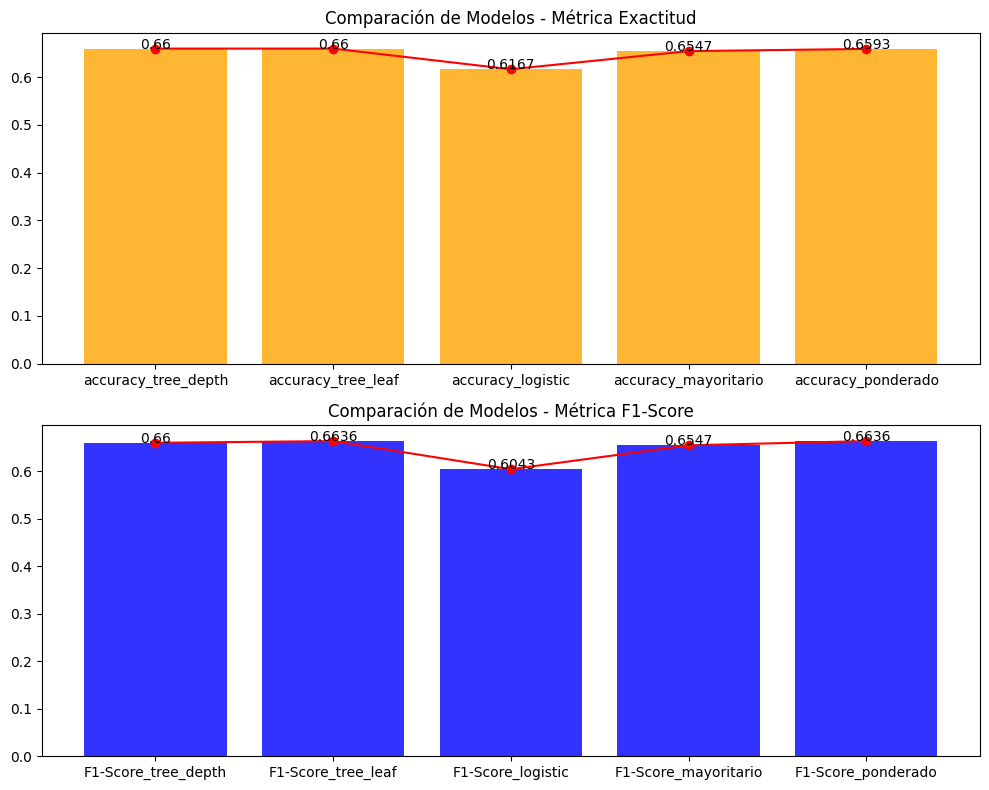

In [103]:
# Celda 9

# Construcción de Gráficas Comparativas
fig = plt.figure(figsize=(10,8))  # Ajuste del tamaño para una sola columna

def addlabels(x,y,plotP):
    for i in range(len(x)):
        plotP.text(i, y[i], y[i], ha='center')

# Primer gráfico - Exactitud
ax1 = plt.subplot(2,1,1)  # Cambiado para una sola columna de 3 filas

ejeX = [
  'accuracy_tree_depth','accuracy_tree_leaf','accuracy_logistic',
  'accuracy_mayoritario', 'accuracy_ponderado']
ejeY = [
  round(accuracy_tree_depth,4),round(accuracy_tree_leaf,4),round(accuracy_logistic,4),
  round(ensemble_accuracy,4), round(accuracy,4)]
ax1.bar(ejeX,ejeY,color='orange', alpha = 0.8)
ax1.plot(ejeX,ejeY,marker='o', color= 'red')
addlabels(ejeX,ejeY,ax1)

ax1.set_title("Comparación de Modelos - Métrica Exactitud")  # Título específico del subplot

# Segundo gráfico - Precisión
ax2 = plt.subplot(2,1,2)  # Ajustado para el segundo gráfico en la columna

ejeX = [
  'F1-Score_tree_depth','F1-Score_tree_leaf','F1-Score_logistic',
  'F1-Score_mayoritario', 'F1-Score_ponderado']

ejeY = [
  round(f1_tree_depth,4),round(f1_tree_leaf,4),round(f1_logistic,4),
  round(ensemble_f1,4), round(f1,4)]
ax2.bar(ejeX,ejeY,color='blue', alpha = 0.8)
ax2.plot(ejeX,ejeY,marker='o', color= 'red')
addlabels(ejeX,ejeY,ax2)

ax2.set_title("Comparación de Modelos - Métrica F1-Score")  # Título específico del subplot

plt.tight_layout()  # Ajusta automáticamente los subplots para que no se solapen
plt.show()


#### Conclusiones
---

En la gráfica anterior, se comparan las métricas de exactitud (Accuracy) y F1-Score para los modelos individuales y los ensamblajes realizados mediante votación mayoritaria y votación ponderada. Observamos que, individualmente, los modelos exhiben métricas inferiores en comparación con los ensamblajes, siendo el modelo de regresión logística el que presenta un rendimiento particularmente más bajo. Por otro lado, el modelo ensamblado con votación ponderada muestra un desempeño ligeramente superior al ensamblaje con votación mayoritaria. Esto se refleja en una exactitud y un F1-Score más altos, lo que indica que la integración ponderada de las predicciones, considerando el rendimiento de cada modelo, contribuye a mejorar la capacidad predictiva global del ensamblaje.